# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

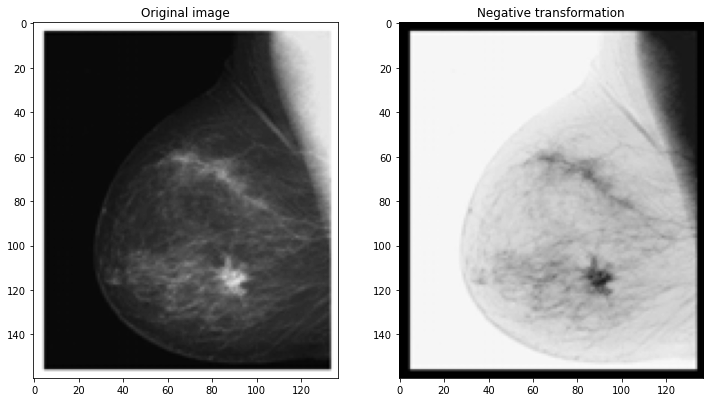

In [3]:
'''
1
Negative Transformation
'''
# function to be applied to the array
transform_pixel = lambda pixel: 1 - pixel
def negative_transformation(image):
    return transform_pixel(image)

picture1 = rgb2gray(io.imread('imgs/Picture1.png')[:,:,:3])
show_images([picture1,negative_transformation(picture1)],["Original image","Negative transformation"])



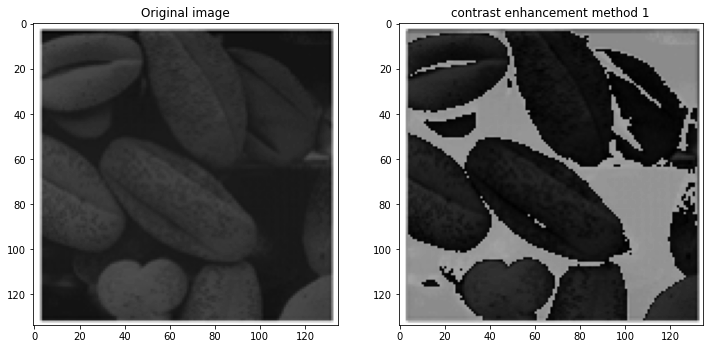

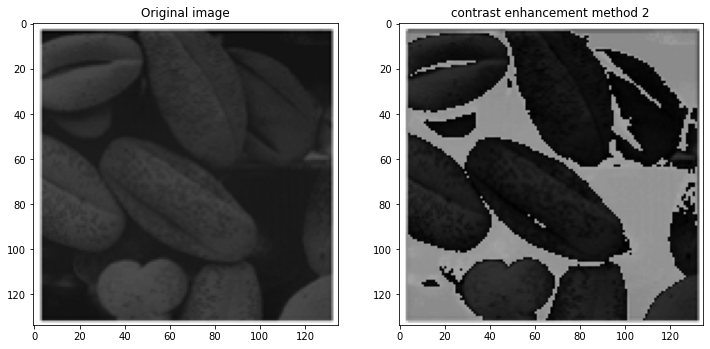

In [17]:
'''
2
Contrast Enhancement
'''

def contrast_enhancement(image):
    tempPicture = image.copy()*255
    tempPicture = np.where(tempPicture<=100,tempPicture*3/2+50,tempPicture)
    return tempPicture

def contrast_enhancement2(image):
    tempPicture = image.copy()*255
    for i in range(tempPicture.shape[0]):
        for j in range(tempPicture.shape[1]):
            if(tempPicture[i][j]<=100):
                tempPicture[i][j] = tempPicture[i][j] * 1.5 + 50
    return tempPicture

picture2 = rgb2gray(io.imread('imgs/Picture2.png')[:,:,:3])
# picture2
show_images([picture2,contrast_enhancement(picture2)],["Original image","contrast enhancement method 1"])
show_images([picture2,contrast_enhancement2(picture2)],["Original image","contrast enhancement method 2"])



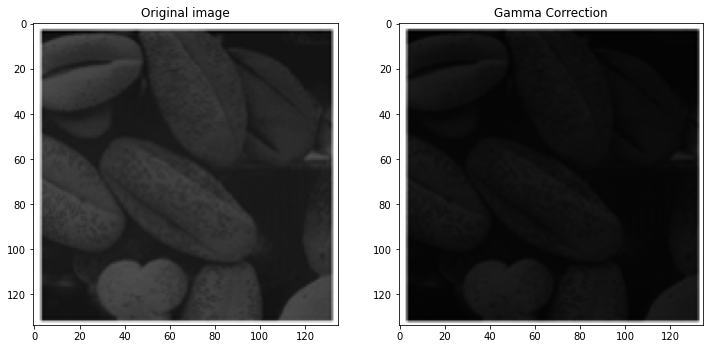

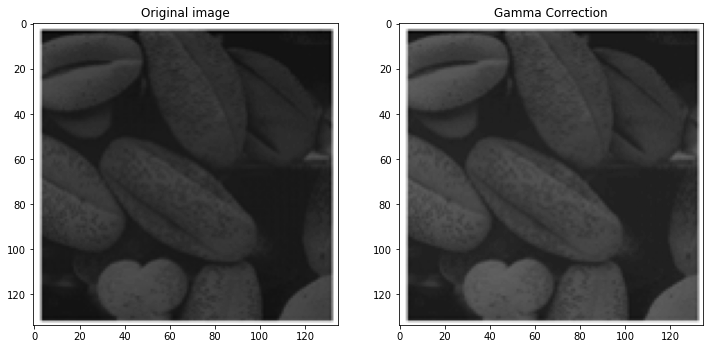

In [5]:
'''
3
Gamma Correction
'''
def gamma_correction(image,c,gamma):
    tempPicture = image.copy()
    return c*(tempPicture**gamma)

picture2 = rgb2gray(io.imread('imgs/Picture2.png')[:,:,:3])
show_images([picture2,gamma_correction(image = picture2,c = 1,gamma = 3)],["Original image","Gamma Correction"])
show_images([picture2,gamma_correction(image = picture2,c = 1,gamma = 0.5)],["Original image","Gamma Correction"])


# What is the effect of decreasing 𝛾 ?

- Decreasing gamma less than 1 increases pixel values because pixel's value is less than 1 so the image becomes lighter

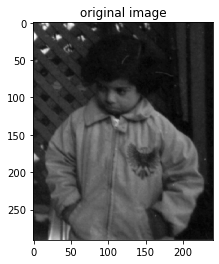

69840.0 69840


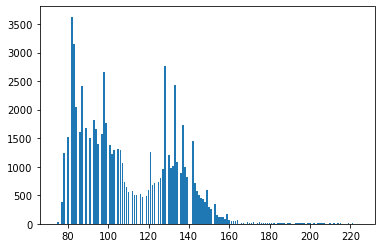

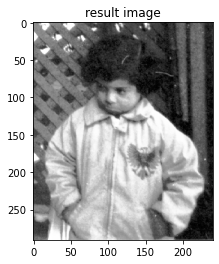

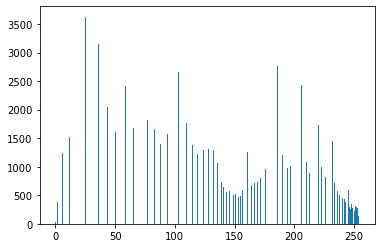

In [37]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
def prefix_sum(h):
    return [sum(h[:i+1]) for i in range(len(h))]

def getImageWithHist(img,ext,nbins=256):
    show_images([img],["original image"])
    showHist(img)
    m, n = img.shape
    h = np.zeros(nbins)
    
    # calc histogram
    for i in range(m):
        for j in range(n):
            h[img[i, j]]+=1

    # accumulate histgram
    h_c = prefix_sum(h)
    
    t = np.zeros(nbins)
    print(h_c[nbins-1],n*m)
    for i in range(nbins):
        t[i] = round((nbins-1)*((h_c[i]/(n*m))))

    result_image = np.zeros((img.shape[0],img.shape[1]))

    for i in range(m):
        for j in range(n):
            #print(img[i][j])
            result_image[i][j] = t[img[i][j]]
    show_images([result_image],["result image"])
    showHist(result_image)
#     return np.array(h)/(m*n)
    

img = io.imread("imgs/pout.tif")
getImageWithHist(img,0)
